In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import investpy

source: [www.codingfinance.com][id]

[id]:https://www.codingfinance.com/post/2018-04-05-portfolio-returns-py/ "Website access"

* * *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

# Return Function

In [3]:
# Program to calculate cumulative moving average
# using numpy
  
import numpy as np
  
arr = [1, 2, 3, 7, 9]
  
i = 1
# Initialize an empty list to store cumulative moving
# averages
moving_averages = []
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
  
# Loop through the array elements
while i <= len(arr):
  
    # Calculate the cumulative average by dividing
    # cumulative sum by number of elements till 
    # that position
    window_average = round(cum_sum[i-1] / i, 2)
      
    # Store the cumulative average of
    # current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1

print(cum_sum)
print(moving_averages)

[ 1  3  6 13 22]
[1.0, 1.5, 2.0, 3.25, 4.4]


In [4]:
# Linear Returns data
def Return(df,x,t_return):
    
    if t_return=='linear':
        print('linear')
        dg=df/df.shift(x)-1
        dg=dg[x:]
        #dg.columns=[df.columns + '_linReturn']# Linear return
        
        #dg[df.columns + '_CumlinReturn']=np.cumsum(dg[df.columns + '_linReturn']) # Cumulative linear return
    #pd.options.display.float_format = '{:.2%} %'.format  #'{:.2f} %'.format()
    #    dg.columns=['%s_lreturn_%sD' % (i,x)]
    #dg=dg[x:]
    elif t_return=='log':
        dg=np.log(df)-np.log(df.shift(x))
        dg=dg[x:]
        #dg.columns=[df.columns + '_logReturn'] #Log return
        #dg[df.columns + '_CumullogReturn']=np.cumsum(dg[df.columns + '_logReturn']) # Cumulative log return
    
    return dg            

# START PORTFOLIO

In [5]:
start = dt.datetime(2013, 1,1) #1980, 1, 1)
end = dt.datetime(2022, 10, 1)

tickers = ['BAC', 'GS', 'JPM', 'MS'] #['AAPL', 'NKE', 'GOOGL','AMZN']
price_data = web.DataReader(tickers,
                        'yahoo', start, end) ['Close']#['Adj Close']

df=price_data.copy()
df

Symbols,BAC,GS,JPM,MS
Date,,,,
2013-01-02,12.030000,131.660004,44.660000,19.620001
2013-01-03,11.960000,130.940002,44.570000,19.580000
2013-01-04,12.110000,134.509995,45.360001,20.190001
2013-01-07,12.090000,134.259995,45.410000,19.799999
2013-01-08,11.980000,133.050003,45.500000,19.650000
...,...,...,...,...
2022-09-26,31.030001,294.619995,106.790001,79.760002
2022-09-27,30.570000,291.380005,105.849998,79.480003
2022-09-28,31.070000,300.790009,107.989998,81.470001


In [ ]:
price_data.calc_stats()

## Returns Matrix

In [8]:
# Matrix Returns
# Using a log return has time additive properties (ln(S2/S3)=ln(1+R2/3)=R2/3 (small R2/3) 
Returns_Portfolio=Return(df,1,'linear')
#Arrange the data in ascending order
Returns_Portfolio=Returns_Portfolio.iloc[::-1]
mean_returns=Returns_Portfolio.mean()
print (mean_returns)

linear
Symbols
BAC    0.000562
GS     0.000482
JPM    0.000488
MS     0.000760
dtype: float64


<AxesSubplot: title={'center': 'Daily Risk Box Plot'}>

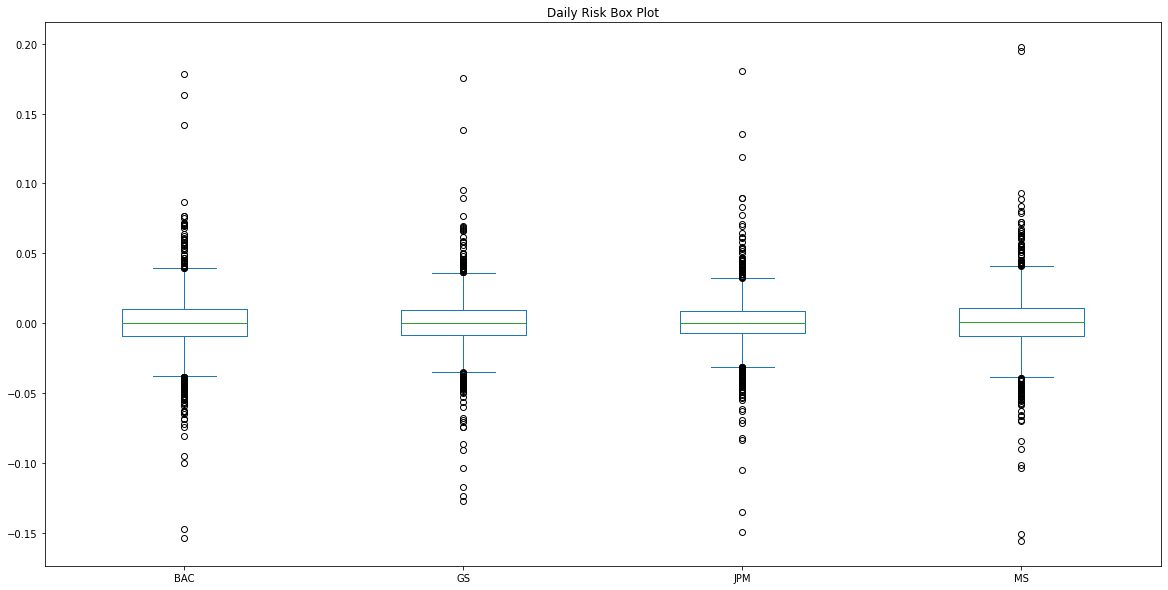

In [9]:
Returns_Portfolio.plot(kind = "box",figsize = (20,10), title = "Daily Risk Box Plot")

In [16]:
# Portfolio Return with weights
w = [0.1, 0.2, 0.5, 0.2]
Return_Port = (w*mean_returns).sum()
print('The portfolio daily return is ', Return_Port)
print('The portfolio annualized return is ', Return_Port*252)

The portfolio daily return is  0.0005488202377531835
The portfolio annualized return is  0.13830269991380223


## Variance & Volatility Matrix

In [10]:
# Matrix Anualised Variance
cov_matrix=Returns_Portfolio.cov() #*252
cov_matrix

Symbols,BAC,GS,JPM,MS
Symbols,,,,
BAC,0.000374,0.000281,0.000292,0.000317
GS,0.000281,0.000311,0.000250,0.000303
JPM,0.000292,0.000250,0.000285,0.000277
MS,0.000317,0.000303,0.000277,0.000386


## Correlation Matrix

In [11]:
corr_matrix =Returns_Portfolio.corr(method='pearson')
corr_matrix

Symbols,BAC,GS,JPM,MS
Symbols,,,,
BAC,1.000000,0.824117,0.895471,0.835198
GS,0.824117,1.000000,0.838356,0.873840
JPM,0.895471,0.838356,1.000000,0.836378
MS,0.835198,0.873840,0.836378,1.000000


## Portfolio Variance

In [12]:
# Randomly weighted portfolio's variance

# w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
w = {'BAC': 0.1, 'GS': 0.2, 'JPM': 0.5, 'MS': 0.2}

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
print("The portfolio variance is :", port_var)

The portfolio variance is : 0.00028556167873881037


# Skewness

## Portfolio Expected Returns

In [70]:
# Yearly returns for individual companies
# Filter on index when it's a Date
#df[(df.index.get_level_values('Date') > '2017-12-31')]
ind_er = df.resample('M').last().pct_change().mean()
ind_er

Symbols
BAC    0.047923
GS     0.028751
JPM    0.023154
MS     0.016663
dtype: float64

In [71]:
# Portfolio expected returns with weights
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.025452061973896798

## Plotting the efficient frontier

In [74]:
# Annualised daily volatility
VCV_y=np.sqrt(Return(df,1,'log').cov()*252)
ann_sd=pd.Series(np.diag(VCV_y), index=[VCV_y.index])
ann_sd.index=ind_er.index
ann_sd

Symbols
BAC    0.175301
GS     0.178486
JPM    0.153495
MS     0.147838
dtype: float64

In [75]:
Exp_Returns=pd.DataFrame(ind_er,columns=['Exp Returns'])
Exp_Vol=pd.DataFrame(ann_sd,columns=['Exp Volatility'])

assets = pd.concat([Exp_Returns,Exp_Vol], axis=1)
assets

,Exp Returns,Exp Volatility
Symbols,,
BAC,0.047923,0.175301
GS,0.028751,0.178486
JPM,0.023154,0.153495
MS,0.016663,0.147838


### Start plotting the efficient fronter over 10000 tests

In [77]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000 # Set the number of iterations to 10 000

In [78]:
for portfolio in range(num_portfolios):
    #Select random weights and normalize to set the sum to 1
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_weights.append(weights)
    
    #Calculate the return and standard deviation for every step
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [81]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.tail() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BAC weight,GS weight,JPM weight,MS weight
9995,0.025714,0.151291,0.068362,0.419869,0.283262,0.228507
9996,0.030433,0.150771,0.273898,0.250141,0.336478,0.139483
9997,0.025188,0.151183,0.124606,0.377453,0.010261,0.487680
9998,0.028147,0.148089,0.234396,0.188567,0.289257,0.287779
9999,0.028363,0.149764,0.198774,0.311385,0.265279,0.224562


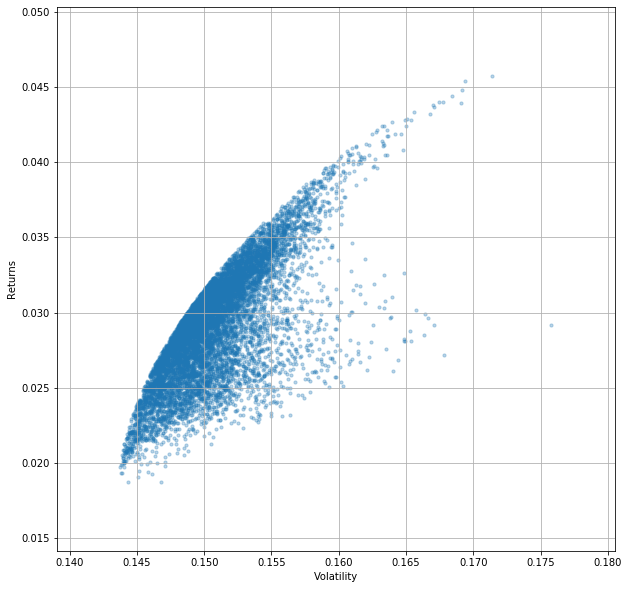

In [82]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [86]:
# Volatility minimisation
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.  
min_vol_port

Returns       0.019703
Volatility    0.143765
BAC weight    0.018217
GS weight     0.014174
JPM weight    0.354224
MS weight     0.613385
Name: 3329, dtype: float64

Text(0, 0.5, 'Returns')

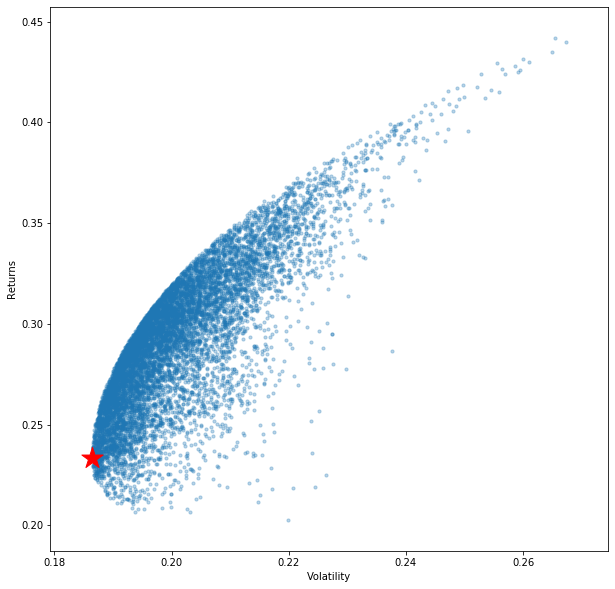

In [213]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

# Optimal Risky Portfolio (maximisation of the sharpe ratio) 



$$Sharpe Ratio=\frac {R_p - R_f}{\sigma_o} $$

$$ \textbf {Where} $$

$$
\begin{cases}
 \bullet {R_p} = \ Return \ of \ Portfolio \\
 \bullet \ {R_f} = \ Risk\ Free \ Rate \\
 \bullet \ {\sigma_o} = Standard \ Deviation \ of \ the \ Portfolio
 \end{cases}       
$$  



In [87]:
# Finding the optimal portfolio
rf = 0.01 # risk free rate
# Maximisation of the Sharpe Ratio
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.045428
Volatility    0.169402
BAC weight    0.876266
GS weight     0.103950
JPM weight    0.017861
MS weight     0.001924
Name: 9892, dtype: float64

Text(0, 0.5, 'Returns')

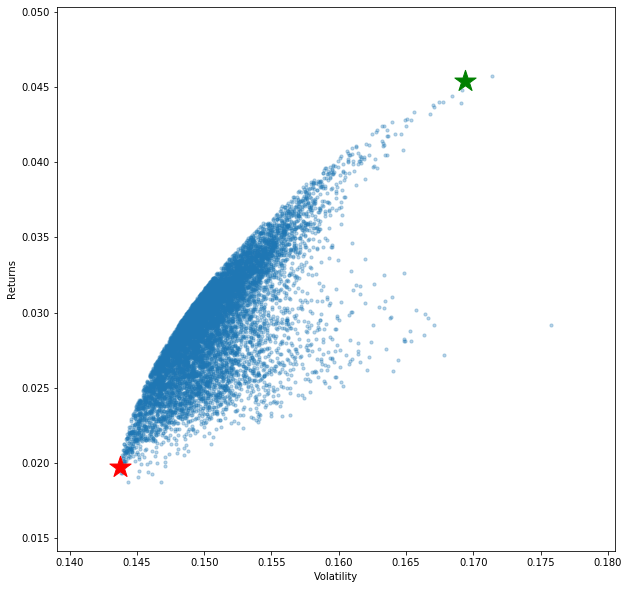

In [88]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
# Simulations spots
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
# Min Vol
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
# Min Sharpe ratio
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [32]:
Returns_Portfolio=Return(df,1,'log')

# Weights
weights=[0.1,0.2,0.1,0.3,0.3]
Portfolio_Return=Returns_Portfolio@weights

# Covariance + annualisation of the Portfolio Covariance (252 trading days)
variance_matrix=Returns_Portfolio.cov()*252

# Portfolio Variance
portfolio_variance=np.transpose(weights)@variance_matrix@weights

# Portfolio volatility
portfolio_volatiity=np.sqrt(portfolio_variance)

print("Portfolio variance is",portfolio_variance)
print("Portfolio volatility is",portfolio_volatiity)


ValueError: Dot product shape mismatch, (502, 12) vs (5,)

# Portfolio Optimisation

## 1 Creation of an efficient fronter

In [30]:
portfolio.resample('Y').mean()

Symbols,AAPL,AMZN,MSFT,GOOGL,META
Date,,,,,
2013-12-31,14.738189,14.901579,27.303535,22.128197,35.481151
2014-12-31,20.626562,16.627552,36.708600,28.406118,68.762341
2015-12-31,27.294871,23.906915,41.468218,30.999411,88.772857
2016-12-31,24.278157,34.976157,50.403992,38.160661,117.035873
2017-12-31,35.601321,48.408351,67.313205,46.988653,156.576175
2018-12-31,45.387336,82.086309,96.292678,56.102179,171.510956
2019-12-31,50.786468,89.459460,126.290362,59.560847,181.637500
2020-12-31,85.797335,125.583612,181.835760,70.524595,221.384264


In [23]:
# Initialisation of empty list for storing the portfolio returns, volatility and weights
port_returns=[]
port_volatility=[]
port_weights=[]

portfolio=price_data

# Assets nb comprise in the portfolio
num_assets=len(portfolio.columns)
num_portfolios= 10000 # nb max of portfolios

# Computing the individual asset return
individual_rets=portfolio.resample('Y').last().pct_change().mean

print(individual_rets)


<bound method DataFrame.mean of Symbols         AAPL      AMZN      MSFT     GOOGL      META
Date                                                        
2013-12-31       NaN       NaN       NaN       NaN       NaN
2014-12-31  0.406225 -0.221771  0.275646 -0.053940  0.427630
2015-12-31 -0.030137  1.177831  0.226919  0.466118  0.341451
2016-12-31  0.124805  0.109456  0.150777  0.018560  0.099274
2017-12-31  0.484643  0.559564  0.407306  0.329295  0.533768
2018-12-31 -0.053902  0.284317  0.207953 -0.008012 -0.257112
2019-12-31  0.889579  0.230277  0.575581  0.281762  0.565718
2020-12-31  0.601848  0.743257  0.357959  0.110879  0.299050>


In [24]:
for port in range(num_portfolios):
    # Weights
    # Randomly generate weights combination
    weights=np.random.random(num_assets)
    # Normalise weights (total sum=1)
    weights=weights/np.sum(weights)
    port_weights.append(weights)
    # Returns
    # Returns= weights * Expected individual returns
    returns=np.dot(weights,individual_rets)
    port_returns.append(returns)
    
    # Computing Portfolio Variance
    var=var_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    # Daily Standard Deviation
    st=np.sqrt(var)
    # Annualisation of the daily standatd deviation
    ann_sd=sd*np.sqrt(252)
    port_volatility.append(ann_sd)

TypeError: unsupported operand type(s) for *: 'float' and 'method'

# Moving average
- https://blog.quantinsti.com/build-technical-indicators-in-python/
- https://dev.to/qviper/python-for-stock-market-analysis-exploring-technical-trend-indicators-a71https://dev.to/qviper/python-for-stock-market-analysis-exploring-technical-trend-indicators-a71


In [6]:
# Linear Moving average
def mov_av(ndays,df,ma_type,nstocks):
    print(len(df.columns))
    if ma_type=='sma': # Simple Moving Average
        df.rolling(window=ndays).mean()
    elif ma_type=='ema': # Exponential Moving Average
        df.ewm(span=ndays, min_periods = ndays - 1, adjust=False).mean()
    elif ma_type=='wma': # Weighted Moving Average
        #df.rolling(window = ndays ).apply(lambda x: np.sum(weights*x)) #
        df.rolling(window=ndays, min_periods=ndays).apply(lambda x: np.average(x, weights=np.arange(1, ndays+1,1)))
    
    for i in df.columns:
        df['%s_%s_%sD' % (i,ma_type,ndays)]=df[i]
        print(len(df.columns))
    
    # Only keep the moverin average elements
    dg=df.iloc[:,nstocks:]
    
    return dg

In [ ]:
mov_av(5,df,'sma',len(symbols))

In [151]:
arr = [1, 2, 3, 7, 9]
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
cum_sum

array([ 1,  3,  6, 13, 22])

In [183]:
Ret_val= Return(price_data,1,'linear')
Ret_val.tail()

linear


Symbols,FB_linReturn,FB_CumlinReturn
Date,,
2022-09-20,-0.013039,-0.723779
2022-09-21,-0.027175,-0.750954
2022-09-22,0.004926,-0.746029
2022-09-23,-0.016874,-0.762903
2022-09-26,-0.017093,-0.779996


In [148]:
Return=logReturn(price_data,1)
Return.head()

Symbols,VOO_logReturn,VEA_logReturn,VB_logReturn,VWO_logReturn,BND_logReturn
Date,,,,,
2013-01-03,-0.000898,-0.010104,-0.000601,-0.005955,-0.002984
2013-01-04,0.004187,0.005626,0.007549,0.001768,0.001553
2013-01-07,-0.002690,-0.005062,-0.002989,-0.008650,-0.000716
2013-01-08,-0.002997,-0.005371,-0.001918,-0.008276,0.000955
2013-01-09,0.002997,0.004807,0.004309,0.005823,-0.000358


# Weights

In [21]:
w = [0.1,0.2,0.25,0.25,0.2]
print(sum(w))

1.0


In [25]:
wts_table = pd.DataFrame({'symbol':symbols,
                          'wts':[0.25,0.25,0.2,0.2,0.1]})
print(wts_table.head())

  symbol   wts
0    VOO  0.25
1    VEA  0.25
2     VB  0.20
3    VWO  0.20
4    BND  0.10


In [23]:
# Weighted returns for each assets
weighted_returns=(Return * w)

# Total return of the portfolio
port_ret = weighted_returns.sum(axis=1)
# axis =1 only add the rows
port_ret

Date
2013-01-03   -0.004347
2013-01-04    0.004184
2013-01-07   -0.004334
2013-01-08   -0.003732
2013-01-09    0.003723
                ...   
2018-02-23    0.011386
2018-02-26    0.006435
2018-02-27   -0.015091
2018-02-28   -0.009193
2018-03-01   -0.004691
Length: 1299, dtype: float64

# Plot Figure

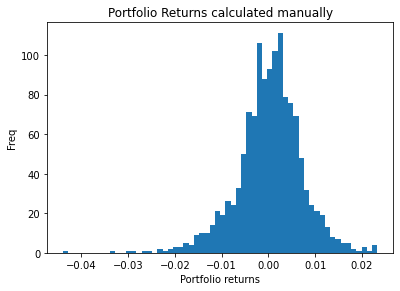

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [ ]:
symbols = ["VEA", "VB", "VWO","BND"] #["AIRF", "BOUY", "AXAF"] #["VOO","VEA", "VB", "VWO","BND"]

for stocks in symbols:
    df = investpy.etfs.get_etf_historical_data(etf='Vanguard FTSE Emerging Markets',
                                               country='united states',
                                               from_date = '01/01/2013',
                                               to_date = '01/03/2022',
                                               as_json=False,
                                               order='ascending')
    price_data=pd.concate([price_data,df])
print(price_data.head())

In [ ]:
investpy.etfs.get_etf_historical_data(etf='US9220428588',
                                      country='united states',
                                      from_date = '01/01/2013',
                                      to_date = '01/03/2022')

In [ ]:
data = investpy.get_etf_historical_data(etf='BBVA Accion DJ Eurostoxx 50', country='spain', from_date='01/01/20000', to_date='01/01/2022')
data.head()

In [ ]:


import investpy
import pandas as pd

import random

from pprint import pprint



In [ ]:


# This function retrieves all the available equities indexed on es.Investing.com
available_equities = investpy.get_equities_list()
pprint(available_equities)



In [ ]:
#Data Source
#https://pypi.org/project/yfinance/
import yfinance as yf

In [ ]:
msft = yf.Tickers("msft aapl goog")
# get historical market data
hist = msft.history(period="max")
hist